# House price prediction

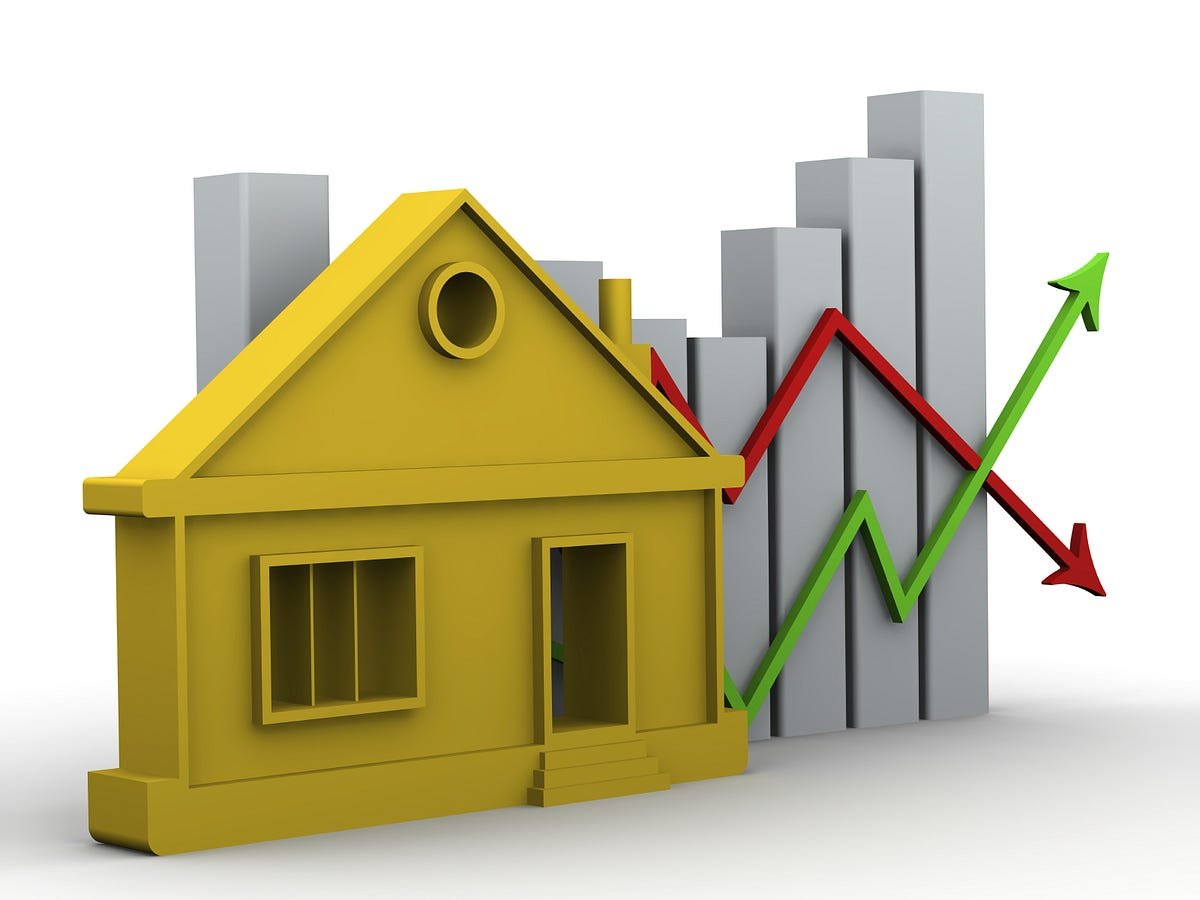

1.   null values - imputation - fill them
> (location - mode, size - 'unknown', bath, balcony are numerical - first check
distribution then replace with mean/median)
but here, bath and balcony are discrete - we cant do histplot . so replace with median. \\
> but, median can contain fractions which is not suggestible \\
> replacing with mode - more wrong replacements \\

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#Data Collection

In [ ]:
df = pd.read_csv('/Bengaluru_House_Data.csv')

# Explanatory Data Analysis


In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [ ]:
df.shape

(13320, 9)

In [ ]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [ ]:
df.duplicated().sum()

529

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(12791, 9)

In [ ]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

society - nearly 45% null values \\
--> if we drop - info loss \\
--> else, fill with 'others' or 'not available'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12790 non-null  object 
 3   size          12775 non-null  object 
 4   society       7463 non-null   object 
 5   total_sqft    12791 non-null  object 
 6   bath          12718 non-null  float64
 7   balcony       12186 non-null  float64
 8   price         12791 non-null  float64
dtypes: float64(3), object(6)
memory usage: 999.3+ KB


In [ ]:
df.describe()

,bath,balcony,price
count,12718.000000,12186.000000,12791.000000
mean,2.708602,1.582308,114.317646
std,1.357764,0.822536,151.480310
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,73.000000
75%,3.000000,2.000000,121.000000
max,40.000000,3.000000,3600.000000


In [ ]:
df.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

**imputations**

In [ ]:
df['location'] = df['location'].fillna(df['location'].mode()[0])

In [ ]:
df['society'] = df['society'].fillna('Unknown')

In [ ]:
df['bath'] = df['bath'].fillna(df['bath'].mode()[0])

In [ ]:
df['balcony'] = df['balcony'].fillna(df['balcony'].mode()[0])

In [ ]:
df['numeric_size'] = df['size'].str.split().str[0]
df['numeric_size'] = pd.to_numeric(df['numeric_size'], errors = 'coerce')

In [ ]:
df = df.drop('size', axis = 1)

In [ ]:
df['numeric_size'] = df['numeric_size'].fillna(df['numeric_size'].mode()[0])

In [ ]:
def calculate_mean(x):
  try:
    if '-' in x:
      values = x.split('-')
      if len(values) == 2:
        mean_value = (float(values[0]) + float(values[1])) / 2
        return mean_value
    else:
      return float(x)
  except ValueError:
    return np.nan
  return float(x)
df['total_sqft'] = df['total_sqft'].apply(calculate_mean)

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12745 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12745 non-null  object 
 1   availability  12745 non-null  object 
 2   location      12745 non-null  object 
 3   society       12745 non-null  object 
 4   total_sqft    12745 non-null  float64
 5   bath          12745 non-null  float64
 6   balcony       12745 non-null  float64
 7   price         12745 non-null  float64
 8   numeric_size  12745 non-null  float64
dtypes: float64(5), object(4)
memory usage: 995.7+ KB


In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['area_type', 'availability', 'location', 'society'], dtype='object')

Numerical type columns:
Index(['total_sqft', 'bath', 'balcony', 'price', 'numeric_size'], dtype='object')


In [ ]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 15:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [ ]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [ ]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['area_type']
Non-Categorical Features: ['availability', 'location', 'society']
Discrete Features: ['balcony']
Continuous Features: ['total_sqft', 'bath', 'price', 'numeric_size']


In [ ]:
df.isnull().sum()

area_type       0
availability    0
location        0
society         0
total_sqft      0
bath            0
balcony         0
price           0
numeric_size    0
dtype: int64

In [ ]:
df.describe()

,total_sqft,bath,balcony,price,numeric_size
count,12745.00000,12745.000000,12745.000000,12745.000000,12745.000000
mean,1569.60368,2.703099,1.603295,114.207350,2.815771
std,1259.83493,1.352340,0.807231,151.591687,1.308425
min,1.00000,1.000000,0.000000,8.000000,1.000000
25%,1100.00000,2.000000,1.000000,50.000000,2.000000
50%,1280.00000,2.000000,2.000000,73.000000,3.000000
75%,1691.00000,3.000000,2.000000,120.000000,3.000000
max,52272.00000,40.000000,3.000000,3600.000000,43.000000


# Data Visualization

In [ ]:
for i in discrete:
    print(i)
    print(df[i].unique())
    print()

balcony
[1. 3. 2. 0.]



In [ ]:
for i in discrete:
    print(df[i].value_counts())
    print()

balcony
2.0    5435
1.0    4683
3.0    1627
0.0    1000
Name: count, dtype: int64



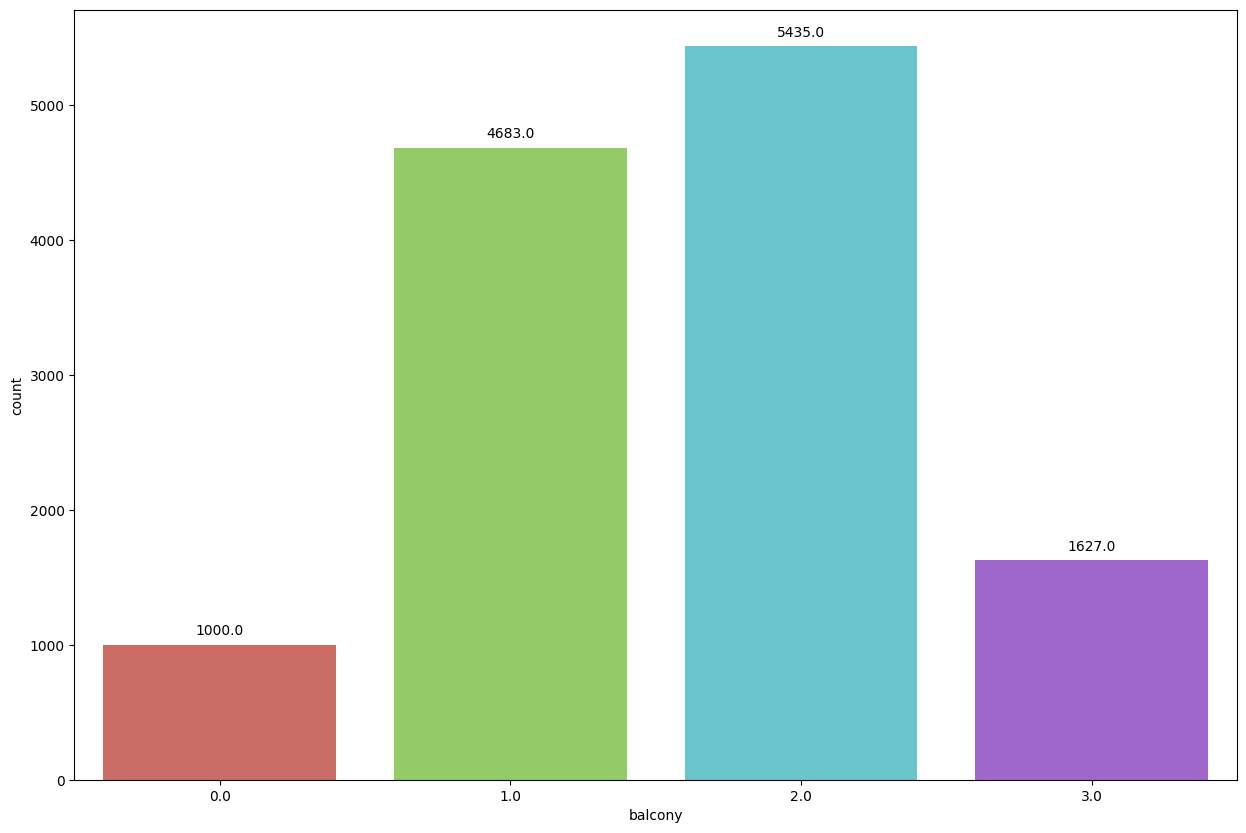

In [ ]:
for i in discrete:
    plt.figure(figsize=(15, 10))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='center')

    plt.show()

In [ ]:
import plotly.express as px

for i in discrete:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

In [ ]:
df[df.numeric_size > 5]

,area_type,availability,location,society,total_sqft,bath,balcony,price,numeric_size
9,Plot Area,Ready To Move,Gandhi Bazar,Unknown,1020.0,6.0,2.0,370.0,6.0
45,Plot Area,Ready To Move,HSR Layout,Unknown,600.0,9.0,2.0,200.0,8.0
58,Plot Area,Ready To Move,Murugeshpalya,Unknown,1407.0,4.0,1.0,150.0,6.0
64,Built-up Area,Ready To Move,Bommanahalli,Unknown,3000.0,8.0,0.0,140.0,8.0
68,Plot Area,Ready To Move,Devarachikkanahalli,Unknown,1350.0,7.0,0.0,85.0,8.0
...,...,...,...,...,...,...,...,...,...
13219,Plot Area,Ready To Move,Laggere,Unknown,1590.0,9.0,3.0,132.0,7.0
13221,Plot Area,Ready To Move,T Dasarahalli,Unknown,1178.0,9.0,1.0,75.0,9.0
13226,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,Unknown,6000.0,8.0,3.0,215.0,8.0
13277,Plot Area,Ready To Move,Kundalahalli Colony,Unknown,1400.0,7.0,2.0,218.0,7.0


In [ ]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']

feature engineering : creating new feature from existing feature

In [ ]:
df

,area_type,availability,location,society,total_sqft,bath,balcony,price,numeric_size,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,Unknown,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,Unknown,1200.0,2.0,1.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,SoosePr,1715.0,3.0,3.0,112.00,3.0,6530.612245
13315,Built-up Area,Ready To Move,Whitefield,ArsiaEx,3453.0,4.0,0.0,231.00,5.0,6689.834926
13316,Super built-up Area,Ready To Move,Richards Town,Unknown,3600.0,5.0,2.0,400.00,4.0,11111.111111
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,Mahla T,1141.0,2.0,1.0,60.00,2.0,5258.545136


In [ ]:
df['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13314     6530.612245
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
Name: price_per_sqft, Length: 12745, dtype: float64

In [ ]:
df['location'].value_counts()

location
Whitefield                        522
Sarjapur  Road                    379
Electronic City                   287
Kanakpura Road                    247
Thanisandra                       228
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Kannur                              1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1299, dtype: int64

In [ ]:
location_stats = df['location'].value_counts()

In [ ]:
len(location_stats[location_stats <= 20])

1160

yooooou are hereeeeee

In [ ]:
locationlessthan20 = location_stats[location_stats <= 20]
locationlessthan20

location
Binny Pete                        20
Kogilu                            20
Yelachenahalli                    20
Sanjay nagar                      20
HBR Layout                        20
                                  ..
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Kannur                             1
singapura paradise                 1
Abshot Layout                      1
Name: count, Length: 1160, dtype: int64

In [ ]:
df.location=df.location.apply(lambda x: 'other' if x in locationlessthan20 else x)
len(df.location.unique())

140

In [ ]:
df.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,numeric_size,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Plot Area,Ready To Move,other,Theanmp,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,Unknown,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,Unknown,1200.0,2.0,1.0,51.00,2.0,4250.000000


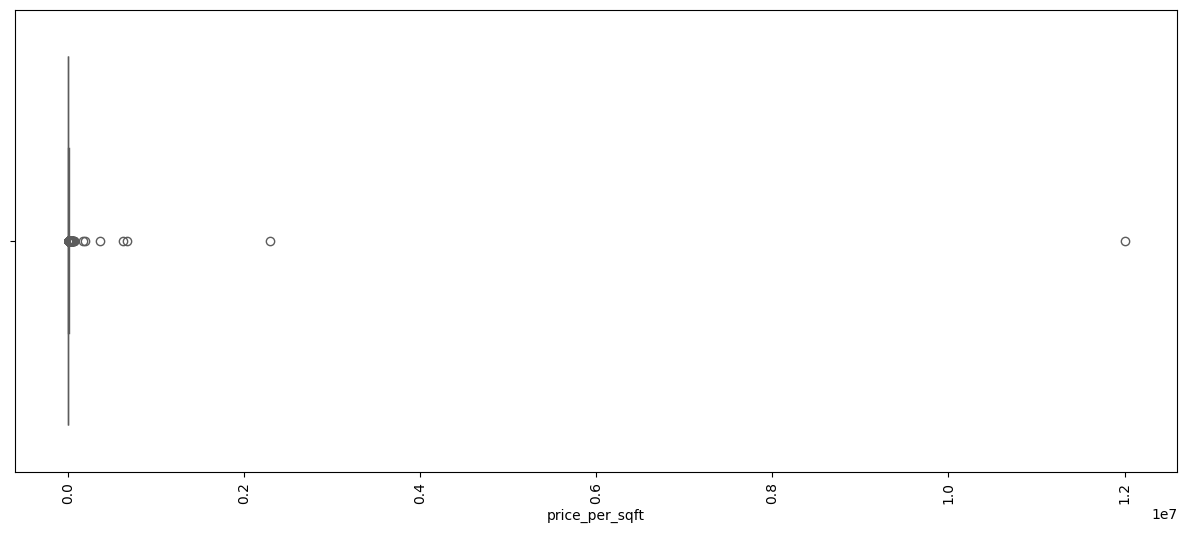

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x = df['price_per_sqft'], data = df, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df1 = df[['total_sqft','bath', 'balcony', 'price', 'numeric_size', 'price_per_sqft']]

In [ ]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
Q1

total_sqft        1100.000000
bath                 2.000000
balcony              1.000000
price               50.000000
numeric_size         2.000000
price_per_sqft    4298.558682
Name: 0.25, dtype: float64

In [ ]:
Q3

total_sqft        1691.000000
bath                 3.000000
balcony              2.000000
price              120.000000
numeric_size         3.000000
price_per_sqft    7398.708162
Name: 0.75, dtype: float64

In [ ]:
IQR

total_sqft         591.00000
bath                 1.00000
balcony              1.00000
price               70.00000
numeric_size         1.00000
price_per_sqft    3100.14948
dtype: float64

In [ ]:
X = Q1 - 1.5 * IQR

In [ ]:
X

total_sqft        213.500000
bath                0.500000
balcony            -0.500000
price             -55.000000
numeric_size        0.500000
price_per_sqft   -351.665538
dtype: float64

In [ ]:
Y = Q3 + 1.5 * IQR

In [ ]:
Y

total_sqft         2577.500000
bath                  4.500000
balcony               3.500000
price               225.000000
numeric_size          4.500000
price_per_sqft    12048.932382
dtype: float64

1.5 rule / turkish rule -- outlier detection

outlier removal


In [ ]:
df = df[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df.shape

(10251, 10)

In [ ]:
df

,area_type,availability,location,society,total_sqft,bath,balcony,price,numeric_size,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2.0,3699.810606
2,Built-up Area,Ready To Move,Uttarahalli,Unknown,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,Unknown,1200.0,2.0,1.0,51.00,2.0,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,DuenaTa,1170.0,2.0,1.0,38.00,2.0,3247.863248
...,...,...,...,...,...,...,...,...,...,...
13309,Super built-up Area,Ready To Move,Yeshwanthpur,IBityin,1675.0,3.0,2.0,92.13,3.0,5500.298507
13310,Super built-up Area,Ready To Move,Rachenahalli,Unknown,1050.0,2.0,2.0,52.71,2.0,5020.000000
13312,Super built-up Area,Ready To Move,Bellandur,Unknown,1262.0,2.0,2.0,47.00,2.0,3724.247227
13314,Super built-up Area,Ready To Move,Green Glen Layout,SoosePr,1715.0,3.0,3.0,112.00,3.0,6530.612245


In [ ]:
df.duplicated().sum()

51

In [ ]:
df = df.drop_duplicates()

In [ ]:
corr = df1.corr()

In [ ]:
corr

,total_sqft,bath,balcony,price,numeric_size,price_per_sqft
total_sqft,1.000000,0.385607,0.152439,0.574008,0.344206,-0.008566
bath,0.385607,1.000000,0.204059,0.450843,0.896237,0.030613
balcony,0.152439,0.204059,1.000000,0.123506,0.190676,0.009317
price,0.574008,0.450843,0.123506,1.000000,0.394577,0.027975
numeric_size,0.344206,0.896237,0.190676,0.394577,1.000000,0.030628
price_per_sqft,-0.008566,0.030613,0.009317,0.027975,0.030628,1.000000


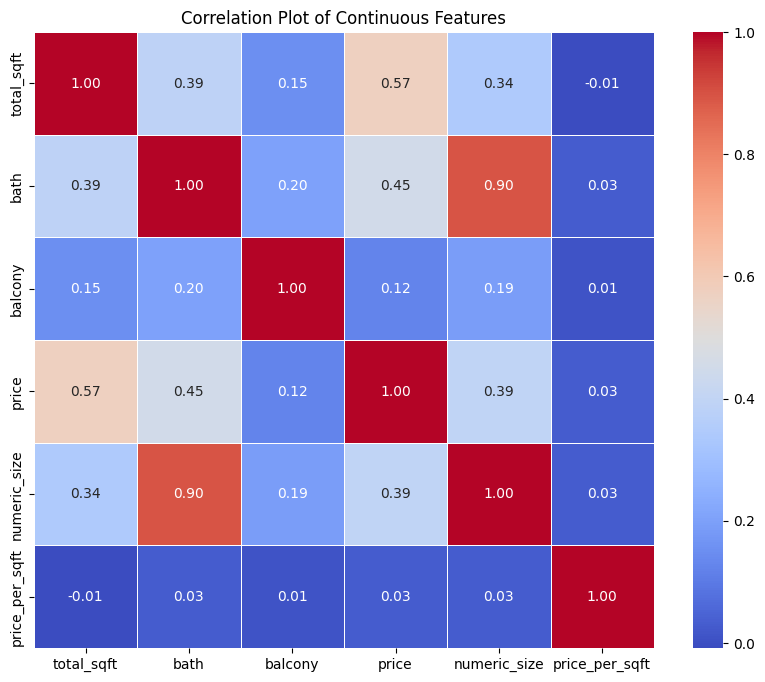

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot of Continuous Features')
plt.show()

In [ ]:
df = df.drop('numeric_size',axis=1)

In [ ]:
df = df.drop('price', axis = 1)

In [ ]:
df['availability']

0               19-Dec
2        Ready To Move
3        Ready To Move
4        Ready To Move
5        Ready To Move
             ...      
13309    Ready To Move
13310    Ready To Move
13312    Ready To Move
13314    Ready To Move
13317    Ready To Move
Name: availability, Length: 10200, dtype: object

In [ ]:
df['availability'] = df['availability'].apply(lambda x: 'Not Ready' if x != 'Ready To Move' else x)

In [ ]:
df.nunique()

area_type            4
availability         2
location           140
society           2433
total_sqft        1483
bath                 4
balcony              4
price_per_sqft    6400
dtype: int64

In [ ]:
df = df.drop('society', axis = 1)

In [ ]:
df.nunique()

area_type            4
availability         2
location           140
total_sqft        1483
bath                 4
balcony              4
price_per_sqft    6400
dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['area_type', 'availability', 'location'])

In [ ]:
df

,total_sqft,bath,balcony,price_per_sqft,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Not Ready,availability_Ready To Move,...,location_Uttarahalli,location_Varthur,location_Vidyaranyapura,location_Vijayanagar,location_Vittasandra,location_Whitefield,location_Yelahanka,location_Yelahanka New Town,location_Yeshwanthpur,location_other
0,1056.0,2.0,1.0,3699.810606,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1440.0,2.0,3.0,4305.555556,True,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
3,1521.0,3.0,1.0,6245.890861,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,1200.0,2.0,1.0,4250.000000,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
5,1170.0,2.0,1.0,3247.863248,False,False,False,True,False,True,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13309,1675.0,3.0,2.0,5500.298507,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
13310,1050.0,2.0,2.0,5020.000000,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
13312,1262.0,2.0,2.0,3724.247227,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
13314,1715.0,3.0,3.0,6530.612245,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df['price_per_sqft'] = np.log(df['price_per_sqft'])

In [ ]:
df['total_sqft'] = np.log(df['total_sqft'])

In [ ]:
X = df.drop('price_per_sqft', axis = 1)
Y = df['price_per_sqft']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0708423719820203


In [ ]:
r2 = r2_score(Y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.3141775109285233


In [ ]:
from sklearn.linear_model import Ridge, Lasso

In [ ]:
ridgeReg = Ridge()
ridgeReg.fit(X_train,Y_train)

Ridge()

In [ ]:
y_pred = ridgeReg.predict(X_test)

In [ ]:
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.07087964780510224


In [ ]:
r2 = r2_score(Y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.31381664500812845


In [ ]:
lasso = Lasso()
lasso.fit(X_train,Y_train)

Lasso()

In [ ]:
y_pred = lasso.predict(X_test)

In [ ]:
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.10338926207593456


In [ ]:
r2 = r2_score(Y_test, y_pred)
print("R2 Score:", r2)

R2 Score: -0.0009077770317555967


In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_model = SVR()

In [ ]:
svr_model.fit(X_train, Y_train)

SVR()

In [ ]:
y_pred = svr_model.predict(X_test)

In [ ]:
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.06935684086996366


In [ ]:
r2 = r2_score(Y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.31712450045453333


In [ ]:
svr_model = SVR(kernel = 'linear')

In [ ]:
svr_model.fit(X_train, Y_train)

SVR(kernel='linear')

In [ ]:
y_pred = svr_model.predict(X_test)

In [ ]:
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.07053796124665439


In [ ]:
r2 = r2_score(Y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.31712450045453333
